# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
path_colab_notebooks = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## Redes Neuronales Convolucionales (CNNs)

Una red neuronal convolucional (CNN) es un tipo de red neuronal artificial donde las neuronas corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico. Este tipo de red es una variación de un perceptron multicapa. Sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

### CNN para la clasificación de imágenes

Las redes neuronales con más de 1 operaciones de convolución se llaman redes neuronales convolucionales (CNN). La entrada de una CNN contiene imágenes con valores numéricos en cada píxel dispuestos espacialmente a lo largo del ancho, alto y profundo (canales). El objetivo de la arquitectura total es obtener una puntuación de probabilidad de una imagen perteneciente a una clase determinada aprendiendo de estos valores numéricos dispuestos espacialmente. En el proceso, realizamos operaciones como el pooling y las convoluciones sobre estos valores numéricos para apretarlos y estirarlos a lo largo de la profundidad.

Una imagen típicamente contiene tres capas, concretamente RGB (Rojo, Verde, Azul).

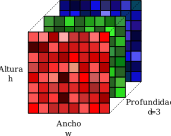

In [4]:
from IPython.display import SVG
SVG(valid_path + 'conv01.svg')

Las redes neuronales convolucionales son similares a las redes neuronales multicanal, su principal ventaja es que cada parte de la red se le entrena para realizar una tarea, esto reduce significativamente el número de capas ocultas, por lo que el entrenamiento es más rápido. Además, presenta invarianza a la traslación de los patrones a identificar. Son capaces de detectar características simples como por ejemplo detención de bordes, lineas, etc y componer en características más complejas hasta detectar lo que se busca.

### Principales operaciones en las CNNs

#### **Convolución**

En la convolución se realizan operaciones de productos y sumas entre la capa de partida y *n* filtros (llamados kernel) en diferentes localidades espaciales en el volumen de entrada (matrices RGB de la imagen de entrada) que genera un mapa de características. Las características extraídas corresponden a cada posible ubicación del filtro (kernel) en la imagen original. El uso de un mayor número de operaciones de convolución ayuda a aprender una forma particular, incluso si se cambia su ubicación en la imagen.

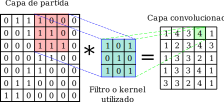

In [ ]:
SVG(valid_path + 'conv02.svg')

La ventaja es que el mismo filtro (en este caso un grupo de neuronas) sirve para extraer la misma característica en cualquier parte de la entrada. Esto reduce el número de conexiones y el número de parámetros a entrenar en comparación con una red multicapa de conexión total. Por ejemplo, generalmente las nubes están presentes en la parte superior de una imagen de un paisaje. Si se introduce una imagen invertida en una CNN, un mayor número de operaciones convolucionales asegura que el modelo identifique la porción de nube incluso si la imagen está invertida.

Matematicamente $x\_nuevo = w.x + b$ donde $w$ es el filtro/kernel, $b$ es el sesgo y $x$ es parte de una salida de capa oculta. Tanto $w$ como $b$ son diferentes para cada operación de convolución aplicada en diferentes capas ocultas.

Los pesos $w$ de cada operación de convolución se actualizan usando backpropagation.

#### **Funcion de activación**

Después de aplicar la convolución se le aplica a los mapas de características una función de activación. La función de activación recomendada es sigmoide ReLU. ReLU es la función de activación preferida por su simple diferenciación y rapidez en comparación con otras funciones de activación como el tanh y el sigmoide. también se puede utilizar funciones como Leaky ReLu o Maxout, pero nunca utilizar sigmoide logística. 

ReLU (Unidad Lineal Rectificada), función rampa o rectificador, es una función de activación definida de forma análoga a la rectificación de media onda en electrónica. Es bioinspirada, y arroja resultados de menor error que los generados con la función logística (inspirada por la teoría de la probabilidad). Además, existe evidencia de ser más practica que la función hiperbólica.

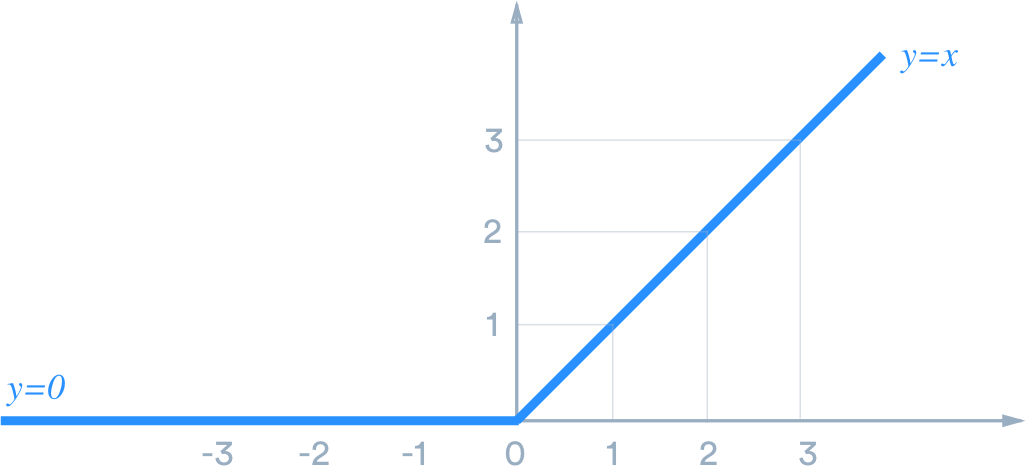

In [5]:
from IPython.display import Image
Image(filename=valid_path + 'conv06.png')

Por ejemplo, verifiquemos el tiempo que se tarda Python en calcular el gradiente de cada función de activación:

In [11]:
import numpy as np
import time
import pandas as pd

def sigmoid_derivative(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return ds

def tanh_derivative(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return dt

def relu_derivative(x):
    if x>0:
        return 1
    else:
        return 0    

start_time = time.time()
sigmoid_derivative(0.658) 
a = ( (time.time() - start_time))
start_time = time.time()
tanh_derivative(0.658)
b = ( (time.time() - start_time))
start_time = time.time()
relu_derivative(0.658)
c = ( (time.time() - start_time))
o = [['ReLU',c*10**6],['Tanh',b*10**6],['Sigmoid',a*10**6]]
df = pd.DataFrame(o,columns=['Funciones de Activacion','Tiempo requerido para calculo de sus derivadas [ms]'])
df

Funciones de Activacion  Tiempo requerido para calculo de sus derivadas [ms]
0                    ReLU                                          31.471252  
1                    Tanh                                          44.345856  
2                 Sigmoid                                          86.307526

#### **Pooling (reducción alternada)**

El pooling reduce las dimensiones espaciales de cada mapa de activación (salida después de la operación de convolución) mientras se agrega la información espacial localizada. En la reducción se disminuye la cantidad de parámetros al quedarse con las características más comunes. La forma de reducir parámetros se realiza mediante la extracción de estadísticas como el promedio o el máximo de una región fija del mapa de características. Al reducir características, el método pierde precisión aunque mejora su compatibilidad. La agrupación ayuda a extraer la salida de las capas ocultas a lo largo de la altura y el ancho. Si se considera el valor máximo dentro de las sub-regiones no superpuestas, entonces esto se denomina Max-pooling. El Max-pooling también añade no linealidad al modelo.

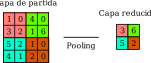

In [ ]:
SVG(valid_path + 'conv03.svg')

#### **Clasificador: Red perceptrón multicapa**

El final de las capas convolucional y de reducción, se suele utilizar capas completamente conectadas en la que cada pixel se considera como una neurona separada al igual que en un perceptrón multicapa. La última capa de esta red es una capa clasificadora que tendrá tantas neuronas como el número de clases a predecir.

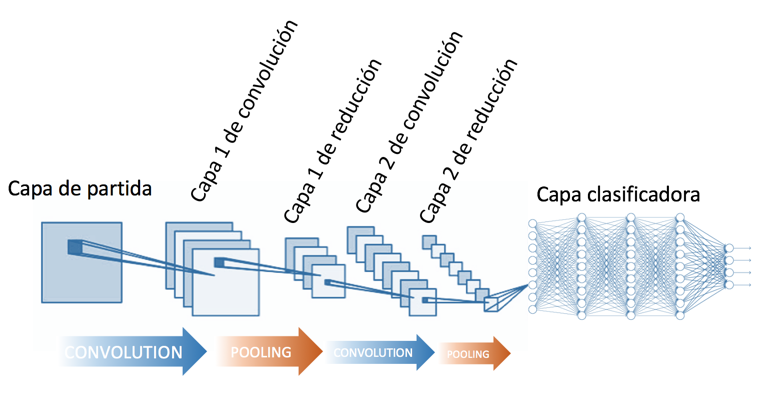

In [12]:
Image(filename=valid_path + 'conv04.png')

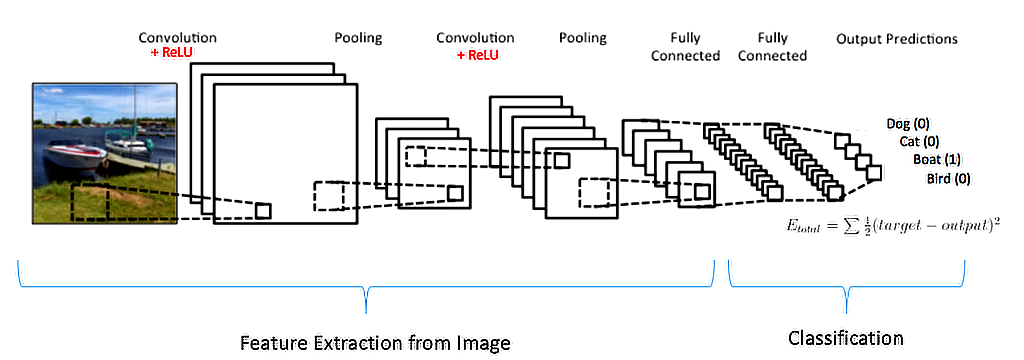

In [13]:
Image(filename=valid_path + 'conv05.png')

#### **Padding (relleno)**

A veces también se utiliza un relleno (padding) entre estas operaciones cuando los bordes de una imagen constituyen aspectos importantes que pueden ser útiles para entrenar al modelo. También puede utilizarse para contener la compresión a lo largo de la altura y la anchura debido a operaciones como el pooling.

### Arquitectura de una CNN

En general, la profundidad de las capas ocultas es alta, ya que el número de filtros utilizados en una operación de convolución es elevado. El número de filtros se mantiene alto a medida que cada filtro aprende nuevas características o nuevas formas.

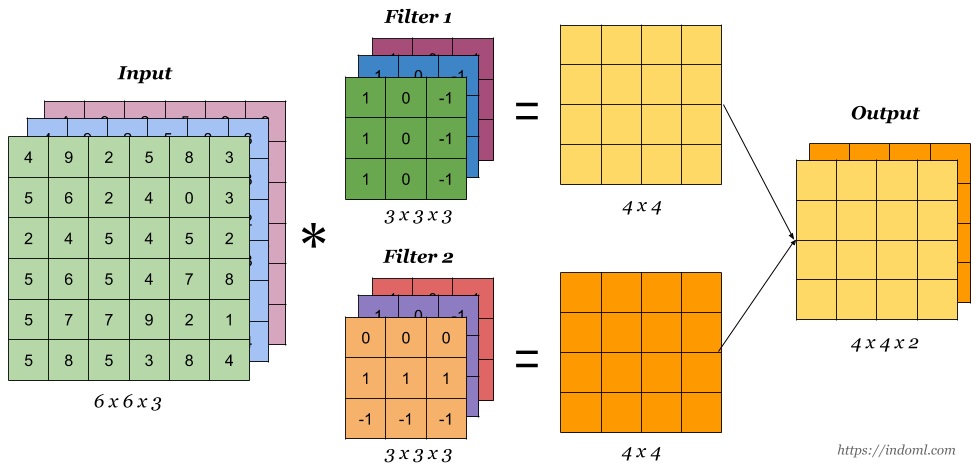

In [14]:
Image(filename=valid_path + 'conv07.png')

En la figura anterior se han usado dos filtros para realizar la operación de convolución y la profundidad de la salida es también 2. Supongamos que si estamos usando 3 filtros/kernels, un kernel podría aprender a identificar los bordes verticales ya que las capas iniciales no pueden aprender características más grandes que el tamaño del filtro (3*3 en este caso). El segundo filtro podría aprender a identificar los bordes horizontales y el tercer filtro podría aprender a identificar los bordes curvos en la imagen.

## Ejemplo: Clasificación de archivos de audio

Los datos de este ejemplo estan conformados por una base de 461 archivos de audio correspondientes a latidos del corazón de seres humanos, grabados digitalmente en formato .wav. Las etiquetas de estos archivos de audio (tres categorias: normal, extrasystole y murmur) se proporcionan en el archivo *h_labels.csv*. Para poder usar la CNN, hay que convertir estos archivos de audio a un formato de imagen, esto se hará con la librería LibROSA.

La transformada de Fourier aplicada sobre una señal de audio (que es una señal en el dominio del tiempo), produce como salida su descomposición en frecuencias. Los espectrogramas son la representación visual de las señales después de aplicar la transformación de Fourier. Los espectrogramas de Mel son espectrogramas con la escala de Mel como su eje $y$.

Los estudios han demostrado que los humanos no perciben las frecuencias en una escala lineal. Somos mejores detectando diferencias en las frecuencias más bajas que en las más altas. Por ejemplo, podemos decir fácilmente la diferencia entre 500 y 1000 Hz, pero difícilmente podremos diferenciar entre 10.000 y 10.500 Hz, aunque la distancia entre los dos pares sea la misma. En 1937, Stevens, Volkmann y Newmann propusieron una unidad de tono tal que distancias iguales en tono sonaran igualmente distantes para el oyente. Esto se llama la escala melódica o escala de Mel.

Comencemos instalando e importando modulos y librerias.

In [15]:
!pip install librosa
!pip install fastai

In [16]:
# Importando modulos y librerias
%matplotlib inline
import os
import pandas as pd
import numpy as np
from fastai.vision import *
import librosa # Paquete para el análisis de música y audio
import librosa.display
import matplotlib.pyplot as plt

Ahora la siguiente es una función Python que crea un espectrograma de Mel de cada archivo de audio y lo guarda en un directorio.

In [17]:
# Funcion para crear el espectrograma de cada imagen
def create_spectogram(filename):
    y, sr = librosa.load(path_colab_notebooks + 'heartbeats/' + filename, duration=3)
    ps = librosa.feature.melspectrogram(y=y, sr=sr,power=2)
    S_dB = librosa.power_to_db(ps, ref=np.max)
    librosa.display.specshow(S_dB, y_axis='mel', x_axis='time')
    plt.savefig(os.path.join(path_colab_notebooks + 'heartbeats_spec/' + filename[:-4]+'.jpg'))

Ahora creamos un arreglo con los nombres de archivos en el directorio:

In [18]:
directory = path_colab_notebooks + 'heartbeats/'
print('Directorio con archivos de audio: ' + str(directory))
file_names = []
for root, dirs, files in os.walk(directory):
  for file_ in files:
    filename = file_
    file_names.append(filename)
print('Cantidad de archivos en el directorio: ' + str(len(file_names)))

Directorio con archivos de audio: /content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/heartbeats/
Cantidad de archivos en el directorio: 461


Y finalmente llamamos la función enviandole el nombre de cada archivo a lo largo del registro de nombres.

In [ ]:
for filename in file_names:
  create_spectogram(filename)

Antes de seguir vamos a revisar los datos de las etiquetas:

In [ ]:
# Labels data: wav
df = pd.read_csv(path_colab_notebooks + 'h_labels.csv')
df.head()

dataset                                            fname         label
0       b  heartbeats/extrastole__127_1306764300147_C2.wav  extrasystole
1       b   heartbeats/extrastole__128_1306344005749_A.wav  extrasystole
2       b   heartbeats/extrastole__130_1306347376079_D.wav  extrasystole
3       b  heartbeats/extrastole__134_1306428161797_C1.wav  extrasystole
4       b   heartbeats/extrastole__138_1306762146980_B.wav  extrasystole

In [ ]:
# Labels data: imagenes
directory2 = path_colab_notebooks + 'heartbeats_spec/'
print('Directorio con archivos de espectro: ' + str(directory2))
file_names_spec = []
for root, dirs, files in os.walk(directory2):
  for file_ in files:
    filename2 = file_
    file_names_spec.append(filename2)
print('Cantidad de archivos en el directorio: ' + str(len(file_names_spec)))

data = {'fname': file_names_spec}
df1 = pd.DataFrame(data, columns = ['fname'])
df2 = df1.sort_values(['fname'])
df2.to_csv(path_colab_notebooks + 'heartbeats_spec/' + 'image.csv')
df2.head()

Directorio con archivos de espectro: /content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/heartbeats_spec/
Cantidad de archivos en el directorio: 461


fname
296  extrastole__127_1306764300147_C2.jpg
277   extrastole__128_1306344005749_A.jpg
300   extrastole__130_1306347376079_D.jpg
212  extrastole__134_1306428161797_C1.jpg
404   extrastole__138_1306762146980_B.jpg

In [ ]:
df3 = pd.read_csv(path_colab_notebooks + 'heartbeats_spec/' + 'image.csv')
imagenes = df3.fname
clases = df.label
data1 = {'fname': imagenes,
        'label': clases}

df4 = pd.DataFrame(data1, columns = ['fname', 'label'])
df4.to_csv(path_colab_notebooks + 'heartbeats_spec/' + 'image_rep.csv')
df4.head()

fname         label
0  extrastole__127_1306764300147_C2.jpg  extrasystole
1   extrastole__128_1306344005749_A.jpg  extrasystole
2   extrastole__130_1306347376079_D.jpg  extrasystole
3  extrastole__134_1306428161797_C1.jpg  extrasystole
4   extrastole__138_1306762146980_B.jpg  extrasystole

A continuación se preparan los datos para la clasificación, y se transforma cada imagen a 512*512. Los datos se dividen en entrenamiento y validación en una proporción de 70:30. El tamaño del lote de 4 se utiliza para paralelizar la tarea en la GPU.

In [ ]:
# Prepararando los datos
path_h_img = path_colab_notebooks + 'heartbeats_spec/'
np.random.seed(1)
data = (ImageList.from_csv(path_h_img, 'image_rep.csv', cols='fname')
        .split_by_rand_pct(0.3) # Separando 30% de los datos para validacion
        .label_from_df(cols='label') # Asignando etiquetas a cada imagen
        .transform( size=512, resize_method=ResizeMethod.SQUISH) # Escalando imagenes a 512*512
        .databunch(bs=4) # Seleccionando batch size de 4
        .normalize(imagenet_stats)) # Normaliza cada canal de imagen con una estadistica

Ahora seleccionamos la arquitectura de red CNN a utilizar. Utilizaremos en este caso una ResNet (Residual Neural network), mas adelante hablaremos de su estructura.

In [ ]:
# Arquitectura Resnet34
arch = models.resnet34

Ahora se define el modelo y se configura 'error_rate' como métrica de error. 'error_rate' es (1-accuracy)

In [ ]:
# Modelo
from fastai.metrics import error_rate
learn = cnn_learner(data, arch, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Elegir el adecuado tipo de aprendizaje para nuestro modelo. La idea es graficar el **learning rate vs loss** y elegir un learning rate antes de que se desvíe. Entrene el $Learner$ a lo largo de algunas iteraciones. Inicie con un muy bajo *start_lr* y cambielo en cada *mini-batch* hasta que alcance un muy alto *end_lr*. $Recorder$ grabará el valor de loss en cada iteración. Grafique estas losses contra la learning rate para encontrar el valor óptimo antes de que se desvie.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 5.75E-07


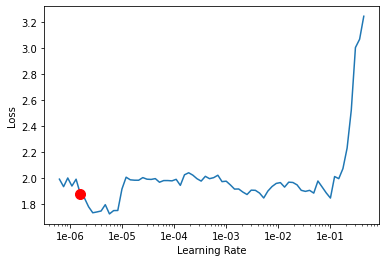

In [ ]:
# Implementación de la prueba de LR Range de Leslie Smith
learn.lr_find()
learn.recorder.plot(suggestion=True)

Después de elegir la rata de aprendizaje correcta (lr = 1E-06) podemos elegir entrenar el modelo usando los parámetros/pesos pre-entrenados mediante el comando $learn.freeze()$.

In [ ]:
lr = 1E-06 # learning rate recomendado
learn.freeze() # Utilizar pesos pre-entrenados excepto en las ultimas capas

Actualizar el modelo utilizando cyclical learning rate 5 veces (es decir, 5 epochs)

In [ ]:
# Ajuste del modelo utilizando cyclical rate of learning rate
learn.fit_one_cycle(15, slice(lr))

Con el modelo entrenado, miremos los resultados de un lote del conjunto de validación. Esta es solo una muestra, y dificilmente puede definir la capacidad del modelo.

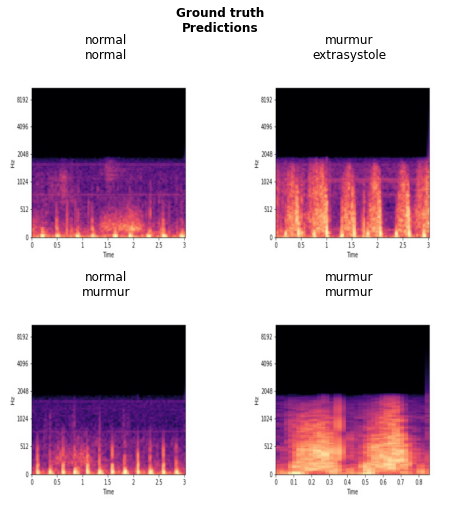

In [ ]:
# Resultados sobre un lote del conjunto de validación
learn.show_results()

Matriz de confusión

In [ ]:
# Matriz de confusión
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

El modelo tiene algún exito en clasificar los latidos normales, pero en general es un muy mal clasificador.